### Ques 1- Plotting and fitting the periodic function

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

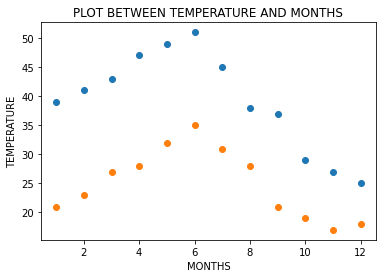

In [36]:
temp_max=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months=np.arange(1,13)
plt.scatter(months,temp_max)
plt.scatter(months,temp_min)
plt.xlabel("MONTHS")
plt.ylabel("TEMPERATURE")
plt.title(label="PLOT BETWEEN TEMPERATURE AND MONTHS")
plt.show()

In [37]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

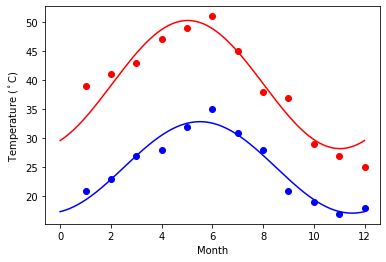

In [38]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

### Ques 2- Plotting the pie chart and scatter plot from the titanic dataset

In [2]:
import seaborn as sns
titanic=sns.load_dataset('titanic')

In [3]:
titnic=pd.DataFrame(titanic)
titnic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titnic['sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

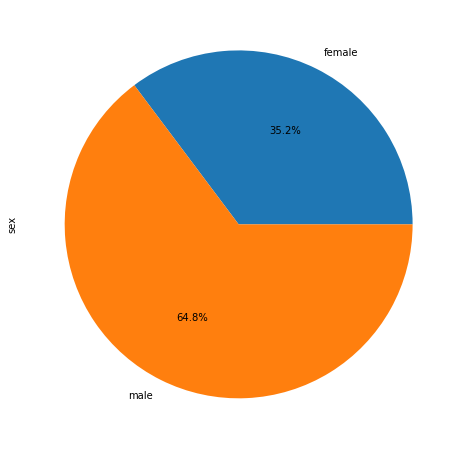

In [45]:
plt.figure(figsize=(8,8))
titnic['sex'].value_counts(sort=False).plot.pie(autopct='%1.1f%%')
plt.show()

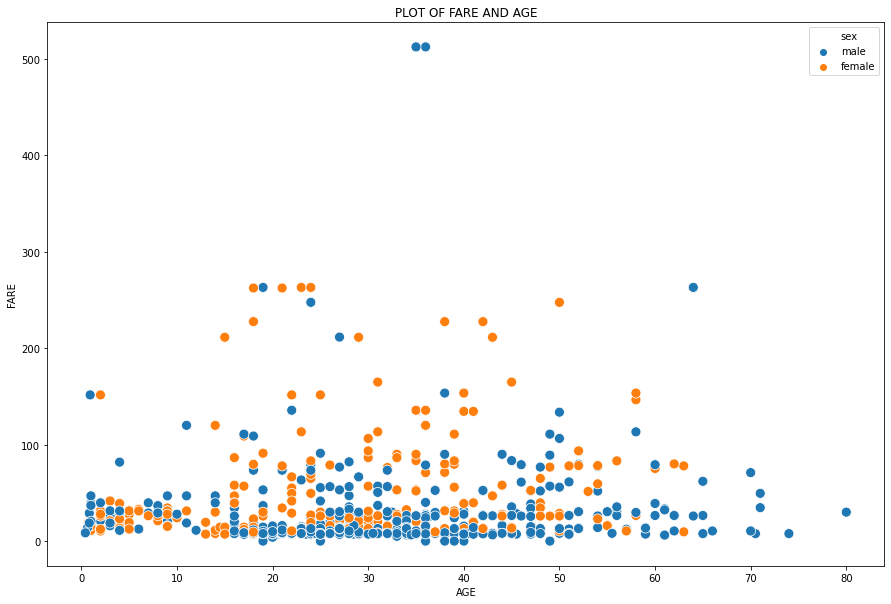

In [34]:
#scatter plot of fair paid and age 
fig_dims = (15,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x=titnic['age'],y=titnic['fare'],hue=titnic['sex'],s=100)
plt.xlabel("AGE")
plt.ylabel("FARE")
plt.title(label="PLOT OF FARE AND AGE")
plt.show()